In [1]:
# import Libraries
import numpy as np
from matplotlib import pyplot
import tensorflow as tf
import seaborn as sns
from pandas import read_csv, DataFrame, concat
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM, Bidirectional
from sklearn.metrics import r2_score
from data import *
from tensorflow.keras.regularizers import l2
import os.path
from tensorflow.keras.models import load_model
from sklearn.metrics import mean_absolute_error

In [2]:
def test(city):
    # load dataset
    dataset = read_csv('./data/' + city + '.csv', header=0, index_col=0)

    # AT_avg, CO_avg, NH3_avg, NO_avg, NO2_avg, NOx_avg, Ozone_avg, PM2.5_avg, PM10_avg, RH_avg, SO2_avg, SR_avg, Temp_avg, WS_avg, Confirmed
    dataset.drop(['Date', 'Recovered', 'Deceased', 'AT_avg', 'CO_avg', 'NH3_avg', 'NO_avg', 'NO2_avg', 'NOx_avg', 'Ozone_avg', 'PM2.5_avg', 'PM10_avg', 'RH_avg', 'SO2_avg', 'SR_avg', 'Temp_avg', 'WS_avg'], axis=1, inplace=True)

    values = dataset.values

    # ensure all data is float
    values = values.astype('float32')

    # normalize features
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_values = scaler.fit_transform(values)

    train = scaled_values[:250, :]
    test = scaled_values[250:, :]

    trainX = []
    trainY = []
    testX = []
    testY = []
    n_future = 1
    n_past = 7

    for i in range(n_past, len(train) - n_future + 1):
        trainX.append(train[i - n_past:i, 0:scaled_values.shape[1]])
        trainY.append(train[i + n_future - 1:i + n_future, -1])

    for i in range(n_past, len(test) - n_future + 1):
        testX.append(test[i - n_past:i, 0:scaled_values.shape[1]])
        testY.append(test[i + n_future - 1:i + n_future, -1])

    trainX, trainY = np.array(trainX), np.array(trainY)
    testX, testY = np.array(testX), np.array(testY)

    model = load_model('./models/' + city + ' LSTM model.h5')
    model.evaluate(testX, testY)

    # make a prediction
    model_yhat_pred = model.predict(testX)
    forecast_copies = np.repeat(model_yhat_pred, scaled_values.shape[1], axis=-1)
    model_yhat = scaler.inverse_transform(forecast_copies)[:, -1]

    model_training_values_pred = model.predict(trainX)
    forecast_copies = np.repeat(model_training_values_pred, scaled_values.shape[1], axis=-1)
    model_training_values = scaler.inverse_transform(forecast_copies)[:, -1]

    forecast_copies = np.repeat(trainY, scaled_values.shape[1], axis=-1)
    trainY_check = scaler.inverse_transform(forecast_copies)[:, -1]

    forecast_copies = np.repeat(testY, scaled_values.shape[1], axis=-1)
    testY_check = scaler.inverse_transform(forecast_copies)[:, -1]

    model_trainScore = r2_score(trainY_check, model_training_values)
    model_testScore = r2_score(testY_check, model_yhat)
    print("Train Score: ", model_trainScore.round(3))
    print("Test Score: ", model_testScore.round(3))

    # reshape
    model_yhat = model_yhat.reshape([testX.shape[0]])
    model_training_values = model_training_values.reshape([trainX.shape[0]])

    # predicted plot
    predicted_plot = np.append(trainY_check, testY_check)

    # training plot
    training_plot = np.zeros(len(dataset))
    training_plot[:] = np.nan
    training_plot[:trainX.shape[0]] = model_training_values

    # testing plot
    testing_plot = np.zeros(len(dataset)-1)
    testing_plot[:] = np.nan
    testing_plot[trainX.shape[0]:trainX.shape[0] + testX.shape[0]] = model_yhat

    # plot using matplotlib
    pyplot.figure(figsize=(4, 4))
    pyplot.plot(predicted_plot, label='actual plot')
    pyplot.plot(training_plot, label='estimated training plot')
    pyplot.plot(testing_plot, label='estimated testing plot')
    pyplot.title(city)
    pyplot.xlabel("Days")
    pyplot.ylabel("Confirmed Cases")
    pyplot.legend()
    pyplot.savefig('./pic/' + city + 'LSTM.png', dpi=1200, bbox_inches='tight')
    pyplot.show()

6/6 [==============================] - 0s 3ms/step - loss: 0.0564 - mean_absolute_error: 0.0399
Train Score:  0.997
Test Score:  0.955


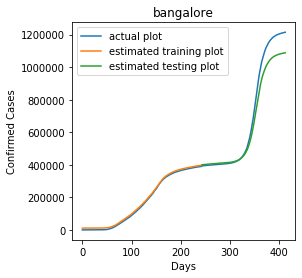

6/6 [==============================] - 0s 3ms/step - loss: 0.0436 - mean_absolute_error: 0.0293
Train Score:  0.996
Test Score:  0.971


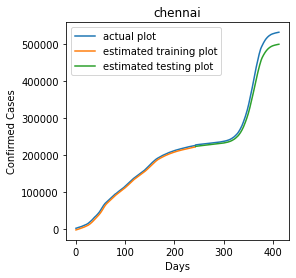

6/6 [==============================] - 0s 3ms/step - loss: 0.0352 - mean_absolute_error: 0.0155
Train Score:  0.998
Test Score:  0.995


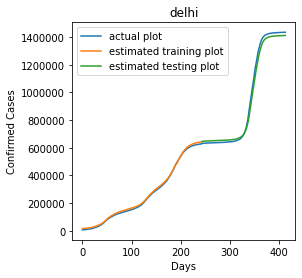

6/6 [==============================] - 0s 2ms/step - loss: 0.0447 - mean_absolute_error: 0.0266
Train Score:  0.999
Test Score:  0.98


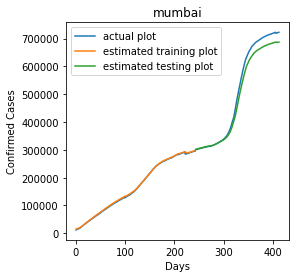

6/6 [==============================] - 0s 3ms/step - loss: 0.0365 - mean_absolute_error: 0.0196
Train Score:  0.999
Test Score:  0.985


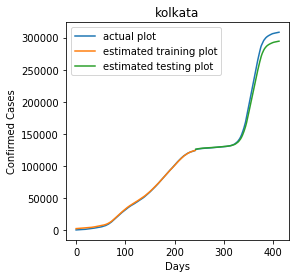

In [3]:
test('bangalore')
test('chennai')
test('delhi')
test('mumbai')
test('kolkata')

In [4]:
def test(city):
    # load dataset
    dataset = read_csv('./data/' + city + '.csv', header=0, index_col=0)

    # AT_avg, CO_avg, NH3_avg, NO_avg, NO2_avg, NOx_avg, Ozone_avg, PM2.5_avg, PM10_avg, RH_avg, SO2_avg, SR_avg, Temp_avg, WS_avg, Confirmed
    dataset.drop(['Date', 'Recovered', 'Deceased', 'AT_avg', 'CO_avg', 'NH3_avg', 'NO_avg', 'NO2_avg', 'NOx_avg', 'Ozone_avg', 'PM2.5_avg', 'PM10_avg', 'RH_avg', 'SO2_avg', 'SR_avg', 'Temp_avg', 'WS_avg'], axis=1, inplace=True)

    values = dataset.values

    # ensure all data is float
    values = values.astype('float32')

    # normalize features
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_values = scaler.fit_transform(values)

    train = scaled_values[:250, :]
    test = scaled_values[250:, :]

    trainX = []
    trainY = []
    testX = []
    testY = []
    n_future = 1
    n_past = 7

    for i in range(n_past, len(train) - n_future + 1):
        trainX.append(train[i - n_past:i, 0:scaled_values.shape[1]])
        trainY.append(train[i + n_future - 1:i + n_future, -1])

    for i in range(n_past, len(test) - n_future + 1):
        testX.append(test[i - n_past:i, 0:scaled_values.shape[1]])
        testY.append(test[i + n_future - 1:i + n_future, -1])

    trainX, trainY = np.array(trainX), np.array(trainY)
    testX, testY = np.array(testX), np.array(testY)

    model = load_model('./models/' + city + ' BiLSTM model.h5')
    model.evaluate(testX, testY)

    # make a prediction
    model_yhat_pred = model.predict(testX)
    forecast_copies = np.repeat(model_yhat_pred, scaled_values.shape[1], axis=-1)
    model_yhat = scaler.inverse_transform(forecast_copies)[:, -1]

    model_training_values_pred = model.predict(trainX)
    forecast_copies = np.repeat(model_training_values_pred, scaled_values.shape[1], axis=-1)
    model_training_values = scaler.inverse_transform(forecast_copies)[:, -1]

    forecast_copies = np.repeat(trainY, scaled_values.shape[1], axis=-1)
    trainY_check = scaler.inverse_transform(forecast_copies)[:, -1]

    forecast_copies = np.repeat(testY, scaled_values.shape[1], axis=-1)
    testY_check = scaler.inverse_transform(forecast_copies)[:, -1]

    model_trainScore = r2_score(trainY_check, model_training_values)
    model_testScore = r2_score(testY_check, model_yhat)
    print("Train Score: ", model_trainScore.round(3))
    print("Test Score: ", model_testScore.round(3))

    # reshape
    model_yhat = model_yhat.reshape([testX.shape[0]])
    model_training_values = model_training_values.reshape([trainX.shape[0]])

    # predicted plot
    predicted_plot = np.append(trainY_check, testY_check)

    # training plot
    training_plot = np.zeros(len(dataset))
    training_plot[:] = np.nan
    training_plot[:trainX.shape[0]] = model_training_values

    # testing plot
    testing_plot = np.zeros(len(dataset)-1)
    testing_plot[:] = np.nan
    testing_plot[trainX.shape[0]:trainX.shape[0] + testX.shape[0]] = model_yhat

    # plot using matplotlib
    pyplot.figure(figsize=(4, 4))
    pyplot.plot(predicted_plot, label='actual plot')
    pyplot.plot(training_plot, label='estimated training plot')
    pyplot.plot(testing_plot, label='estimated testing plot')
    pyplot.title(city)
    pyplot.xlabel("Days")
    pyplot.ylabel("Confirmed Cases")
    pyplot.legend()
    pyplot.savefig('./pic/' + city + 'BiLSTM.png', dpi=1200, bbox_inches='tight')
    pyplot.show()

6/6 [==============================] - 1s 3ms/step - loss: 0.0539 - mean_absolute_error: 0.0363
Train Score:  0.992
Test Score:  0.972


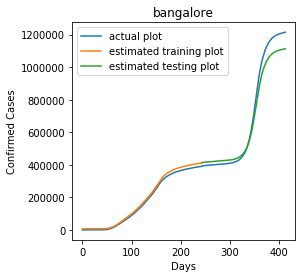

6/6 [==============================] - 1s 3ms/step - loss: 0.0343 - mean_absolute_error: 0.0184
Train Score:  0.999
Test Score:  0.986


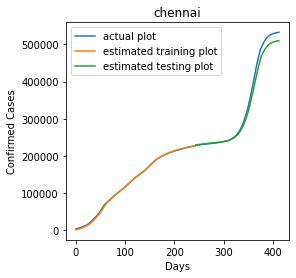

6/6 [==============================] - 1s 3ms/step - loss: 0.0345 - mean_absolute_error: 0.0139
Train Score:  0.999
Test Score:  0.996


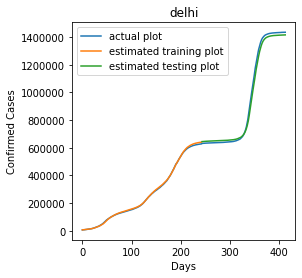

6/6 [==============================] - 1s 3ms/step - loss: 0.0399 - mean_absolute_error: 0.0204
Train Score:  1.0
Test Score:  0.989


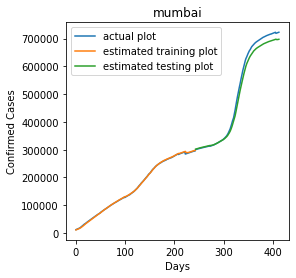

6/6 [==============================] - 1s 3ms/step - loss: 0.0390 - mean_absolute_error: 0.0190
Train Score:  1.0
Test Score:  0.986


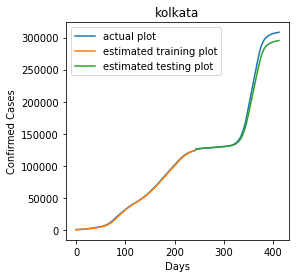

In [5]:
test('bangalore')
test('chennai')
test('delhi')
test('mumbai')
test('kolkata')